<a href="https://colab.research.google.com/github/ParkSunhwa/200722_BootCamp1/blob/master/Parksunhwa_262948.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

In [8]:
# cifar10 이미지 로딩
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])

print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

print(X_train.shape, X_train.dtype)

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32
(50000, 32, 32, 3) uint8


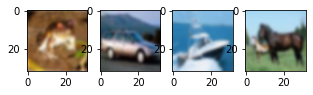

In [9]:
# 이미지 시각화
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [12]:
# 이미지 정규화 ( 스케일링 )
print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]

X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

# 모델 구현 및 훈련 - 재구현 필요
num_classes = 10     
batchSize = 512                   #-- Training Batch Size
num_epochs = 20                   #-- Number of epochs for training   
learningRate= 0.01                #-- Learning rate for the network
img_rows = 32                     #-- input image dimensions
img_cols = 32 
img_ch=3

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996
2.126789409516928


In [13]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, units=10, batch_size=512, learning_rate=0.01, n_kernels=10):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w1 = None          # 합성곱 층의 가중치      ^^^^
        self.conv_b1 = None
        self.conv_w2 = None          # 합성곱 층의 가중치      ^^^^
        self.conv_b2 = None
        self.conv_w3 = None          # 합성곱 층의 가중치      ^^^^
        self.conv_b3 = None
        self.conv_w4 = None          # 합성곱 층의 가중치      ^^^^
        self.conv_b4 = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 첫번째 은닉층의 가중치
        self.b1 = None              # 첫번째 은닉층의 절편
        self.w2 = None              # 두번째 은닉층의 가중치
        self.b2 = None              # 두번째 은닉층의 절편
        self.a1 = None              # 첫번째 은닉층의 활성화 출력
        self.w3 = None              # 출력층의 가중치
        self.b3 = None              # 출력층의 절편
        self.a2 = None              # 두번째 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # print("x.shape", x.shape)
        # 3x3 합성곱 연산을 수행합니다.
        # print(self.conv_w1.shape)
        c_out1 = tf.nn.conv2d(x, self.conv_w1, strides=1, padding='SAME') + self.conv_b1
        # 렐루 활성화 함수를 적용합니다.
        r_out1 = tf.nn.relu(c_out1)
        # 2x2 최대 풀링을 적용합니다.
        p_out1 = tf.nn.max_pool2d(r_out1, ksize=2, strides=2, padding='VALID')
        # print(p_out1.shape)
        # print(self.conv_w2.shape)
        c_out2 = tf.nn.conv2d(p_out1, self.conv_w2, strides=1, padding='SAME') + self.conv_b2
        r_out2 = tf.nn.relu(c_out2)
        p_out2 = tf.nn.max_pool2d(r_out2, ksize=2, strides=2, padding='VALID')
        # print(p_out2.shape)
        # print(self.conv_w3.shape)
        c_out3 = tf.nn.conv2d(p_out2, self.conv_w3, strides=1, padding='SAME') + self.conv_b3
        r_out3 = tf.nn.relu(c_out3)
        p_out3 = tf.nn.max_pool2d(r_out3, ksize=2, strides=2, padding='VALID')
        # print(p_out3.shape)
        # print(self.conv_w4.shape)
        c_out4 = tf.nn.conv2d(p_out3, self.conv_w4, strides=1, padding='SAME') + self.conv_b4
        r_out4 = tf.nn.relu(c_out4)
        p_out4 = tf.nn.max_pool2d(r_out4, ksize=2, strides=2, padding='VALID')
        
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
        f_out = tf.reshape(p_out4, [x.shape[0], -1])
        # print("f_out.shape", f_out.shape)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                        # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2
        
        a2 = tf.nn.relu(z2) 
        z3 = tf.matmul(a2, self.w3) + self.b3
        return z3
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w1 = tf.Variable(g((3, 3, 3, 64)))
        self.conv_b1 = tf.Variable(np.zeros(64), dtype=float)
        self.conv_w2 = tf.Variable(g((3, 3, 64, 64)))
        self.conv_b2 = tf.Variable(np.zeros(64), dtype=float)
        self.conv_w3 = tf.Variable(g((3, 3, 64, 128)))
        self.conv_b3 = tf.Variable(np.zeros(128), dtype=float)
        self.conv_w4 = tf.Variable(g((3, 3, 128, 256)))
        self.conv_b4 = tf.Variable(np.zeros(256), dtype=float)
        
        n_features = 2 * 2 * 256
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((512, 512)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(512), dtype=float)     # 클래스 개수
        self.w3 = tf.Variable(g((512, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b3 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        self.optimizer = tf.optimizers.Adam(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            print(self.losses[-1])
            # 검증 세트에 대한 손실을 계산합니다.
            # self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w1, self.conv_b1,self.conv_w2, self.conv_b2,self.conv_w3, self.conv_b3,self.conv_w4, self.conv_b4,
                        self.w1, self.b1, self.w2, self.b2, self.w3, self.b3]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [15]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

cn = ConvolutionNetwork(units=512, batch_size=16, learning_rate=0.0008)
cn.fit(X_train, y_train_encoded, epochs=num_epochs)

cn.score(X_test, y_test_encoded)

에포크 0 ..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.7526

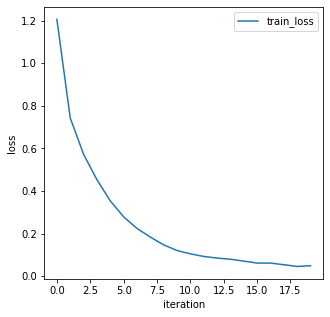

In [24]:
import matplotlib.pyplot as plt
plt.plot(cn.losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss'])
plt.show()

In [25]:
cn.score(X_test, y_test_encoded)

0.7526